# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 9381 Шахин Никита и Аухадиев Александр. Вариант №7

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

### Классификация сигналов

1. Периодические и непериодические сигналы
2. Детерменированные и случайные сигналы
3. Сигналы с конечной (ограниченной) и бесконечной (неограниченной) энергией
4. Аналоговые, дискретные и цифровые сигналы

### Частота Найквиста

Гармонический сигнал может быть представлен дискретными отсчётами, если его частота не превышает половины частоты дискретизации:

$f_N = {{f_d} \over 2} = {1 \over {2T}}$; $\omega_N = {\omega_d \over 2} = {\pi \over T}$,

где $f_N$ - частота гармонического сигнала, $f_d$ - частота дискретизации.

В зависимости от соотношения между частотой дискретизируемого гармонического сигнала и частотой Найквиста возможны три случая:

1. Если частота гармонического сигнала меньше чатсоты Найквиста, дискретные отсчёты позволяют правильно восстановить аналоговый сигнал.
2. Если частота гармонического сигнала равна частоте Найквиста, то дискретные отсчёты позволяют восстановить аналоговый гармонический сигнал с той же частотой, но амплитуда и фаза восстановленного сигнала могут быть искажены.
3. Если частота гармонического сигнала больше частоты Найквиста, восстановленный по дискретным отсчётам аналоговый сигнал будет также гармоническим, но с иной частотой. Данный эффект носит навзвание появления ложных частот.

### Энергия и мощность сигнала

Энергия: $E = \int\limits_0^T s^2 (t)dt$

Мгновенная мощность: $p(t) = s^2 (t)$

Средняя мощность: $P_{cp} = {1 \over T} \int\limits_0^T s^2 (t)dt$

### Некоторые специальные виды детерминированных дискретных сигналов

Единичный цифровой импульс: $\delta_d (k) = \begin{equation*}
\begin{cases}
   1, k = 0\\
   0, k \neq 0
 \end{cases}
\end{equation*}$

Дискретный единичный скачок: $\sigma_d (k) = \begin{equation*}
\begin{cases}
   1, k \geq 0\\
   0, k < 0
 \end{cases}
\end{equation*}$

Дискретная экспоненциальная функция: $s(k) = \begin{equation*}
\begin{cases}
   0, k < 0\\
   a^k, k \geq 0
 \end{cases}
\end{equation*}$

Дискретная затухающая синусоида: $s(k) = a^k cos(k\omega + \varphi)$

### Характеристики дискретного сигнала (последовательности отсчётов)

1. Среднее значение
2. Мощность - сумма квадратов значений отсчётов
3. Средняя мощность
4. Автокорреляционная функция (АКФ):

$R_s (m) = {1 \over {N - m}}\sum\limits_{n=0}^{N-m-1} s(n) s(n+m), 0 \leq m \leq (N-1)$

5. Автоковариационная функция:

$r_s (m) = {1 \over {N- m}} \sum\limits_{n=0}^{N-m-1} [s(n) - \mu_s][s(n+m) - \mu_s], 0 \leq m \leq (N-1)$

## Постановка задачи

1. Смоделировать единичный цифровой импульс $\delta_d (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. Пояснить:

a. взаимосвязь между дискретным и дискретным нормированным временем;

b. различие между единичным цифровым импульсом и дельта-функцией.

2. Смоделировать дискретный единичный скачок $\sigma_d (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. Пояснить:

a. соответствие между дискретным и аналоговым единичными скачками;

b. чему равна частота дискретизации дискретного единичного скачка.

3. Смоделировать дискретную экспоненциальную функцию $s_1 (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. Пояснить соответствие между дискретной и аналоговой экспонентами.


4. Смоделировать дискретный комплексный гармонический сигнал $s_2 (k) = C exp(j \hat\omega_0 k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0, N-1]$. Записать данный сигнал в виде комбинации двух вещественных последовательностей.


5. Вывести графики последовательностей $\delta_d (k), \sigma_d (k)$ и $s_1 (k)$, задержанных на m отсчетов, на интервале времени $n \in [0, N-1]$. Записать формулы задержанных последовательностей.


6. Сделать выводы.

## Выполнение работы

Импорт необходимых библиотек, определение переменных и используемых функций:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Исходные данные:
def get_var():
    variables = {'Nb': 7}
    variables['N'] = 30 + variables['Nb'] % 5
    variables['T'] = 0.0005 * (1 + variables['Nb'] % 3)
    variables['a'] = (-1) ** variables['Nb'] * (0.8 + 0.005 * variables['Nb'])
    variables['C'] = 1 + variables['Nb'] % 5
    variables['w0'] = math.pi / (6 + variables['Nb'] % 5)
    variables['m'] = 5 + variables['Nb'] % 5
    variables['U'] = variables['Nb']
    variables['n0'] = variables['Nb'] % 5 + 3
    variables['n_imp'] = variables['Nb'] % 5 + 5
    variables['B1'] = 1.5 + variables['Nb'] % 5
    variables['B2'] = 5.7 - variables['Nb'] % 5
    variables['B3'] = 2.2 + variables['Nb'] % 5
    variables['w1'] = math.pi / (4 + variables['Nb'] % 5)
    variables['w2'] = math.pi / (8 + variables['Nb'] % 5)
    variables['w3'] = math.pi / (16 + variables['Nb'] % 5)
    variables['a1'] = 1.5 - variables['Nb'] % 5
    variables['a2'] = 0.7 + variables['Nb'] % 5
    variables['a3'] = 1.4 + variables['Nb'] % 5

    variables['x1'] = lambda k: variables['B1'] * np.sin(variables['w1'] * k)
    variables['x2'] = lambda k: variables['B2'] * np.sin(variables['w2'] * k)
    variables['x3'] = lambda k: variables['B3'] * np.sin(variables['w3'] * k)

    return variables

vv = get_var()
x = np.linspace(0, (vv['N'] - 1) * vv['T'])
x_norm = np.linspace(0, vv['N'] - 1, vv['N']+1)

#Единичная импульсная функция
def dirak(_x, m=0):
    y = np.zeros(_x.shape)
    y[_x == m] = 1
    return y

#Функция единичного скачка
def hs(_x, m=0):
    return np.heaviside(_x - m, 1)

#Дискретная экспоненциальная функция
def exp(_x, m=0, part='real'):
    y = np.zeros(_x.shape)
    ans = np.float_power(vv['a'] + 0j, _x[_x >= m] - m)
    y[_x >= m] = ans.real if part == 'real' else ans.imag
    return y

#Дискретный комплексный гармонический сигнал
def exp2(_x, part='real'):
    ans = vv['C'] * np.exp(1j * vv['w0'] * _x)
    return ans.real if part == 'real' else ans.imag

1. Смоделируем единичный цифровой импульс $\delta_d (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. 

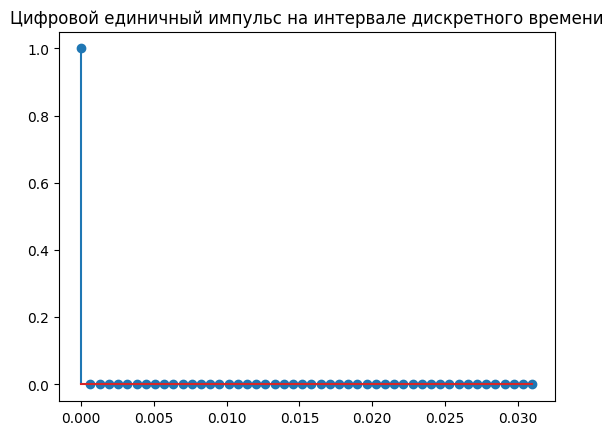

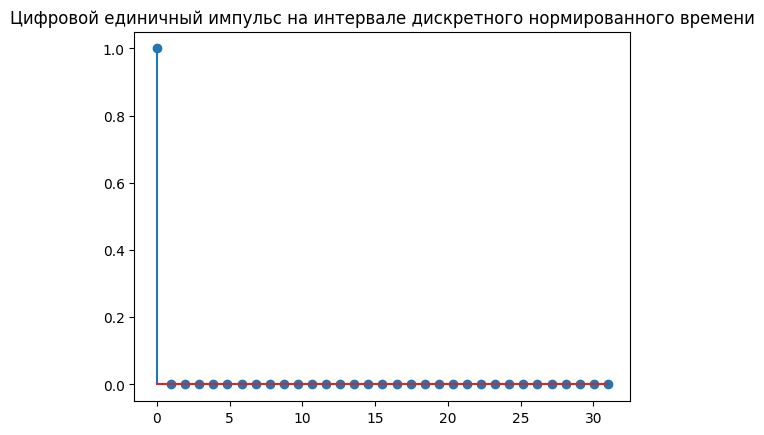

In [2]:
plt.stem(x, dirak(x, 0))
plt.title("Цифровой единичный импульс на интервале дискретного времени")
plt.show()
plt.stem(x_norm, dirak(x_norm, 0))
plt.title("Цифровой единичный импульс на интервале дискретного нормированного времени")
plt.show()

a. Взаимосвязь между дискретным и дискретным нормированным временем: дискретное нормированное время n – это дискретное время nT с периодом дискретизации T=1.

b. Различие между единичным цифровым импульсом и дельта-функцией: у единичного импульса амплитуда равна единице, а у функции дельта-функции – бесконечности. Из-за этого дельта-функция на практике не реализуема.

2. Смоделируем дискретный единичный скачок $\sigma_d (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$:

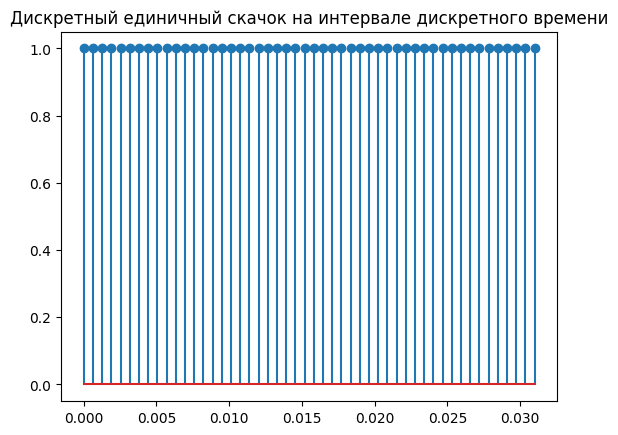

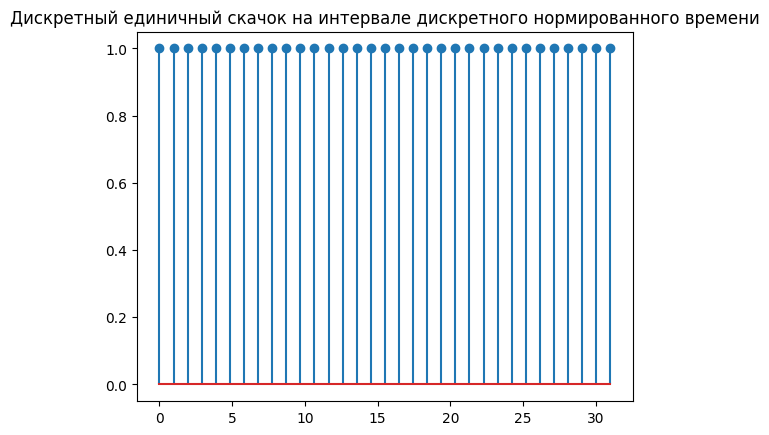

In [3]:
plt.stem(x, hs(x))
plt.title("Дискретный единичный скачок на интервале дискретного времени")
plt.show()
plt.stem(x_norm, hs(x_norm))
plt.title("Дискретный единичный скачок на интервале дискретного нормированного времени")
plt.show()

a. Соответствие между дискретным и аналоговым единичными скачками: цифровой единичный скачок получается путем дискретизации аналогового единичного скачка. 

b. Реальный аналоговый сигнал можно приближенно представить некоторой суммой единичных скачков, возникающих в последовательные моменты времени. Устремив к нулю длительность интервала времени между единичными скачками, в пределе будет получаться точная огибающая реального исходного сигнала.

Частота дискретизации дискретного единичного скачка равна: $f_д \geq f_в$, где $f_в$ – верхняя граница частоты спектра аналогового сигнала.

3. Смоделируем дискретную экспоненциальную функцию $s_1 (k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. 


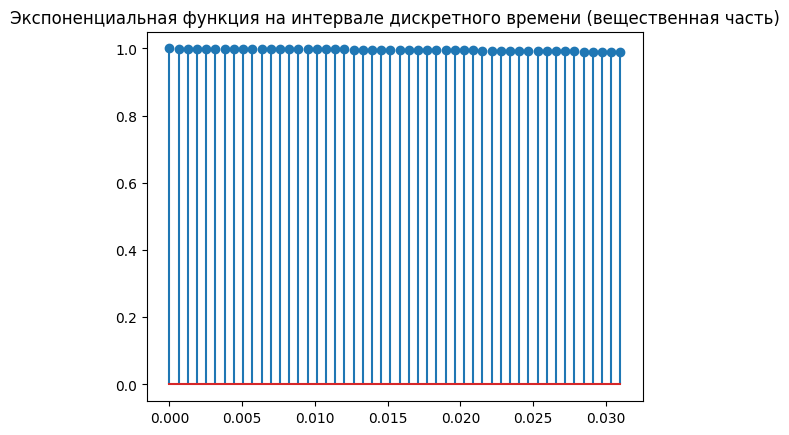

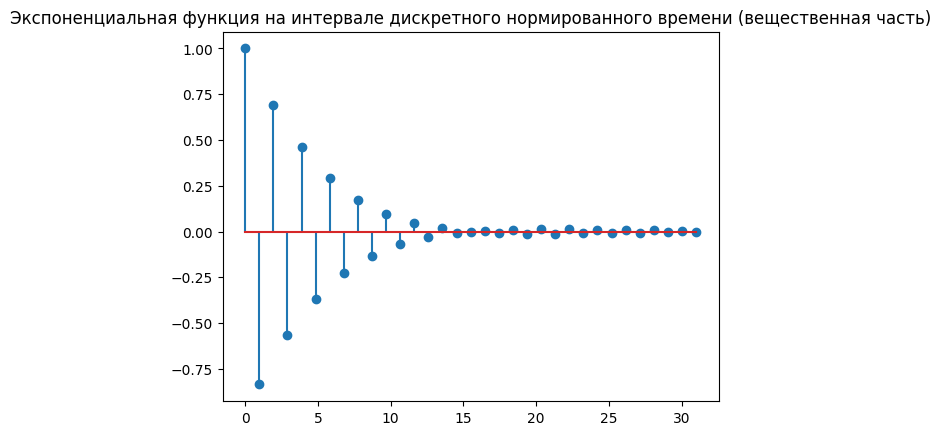

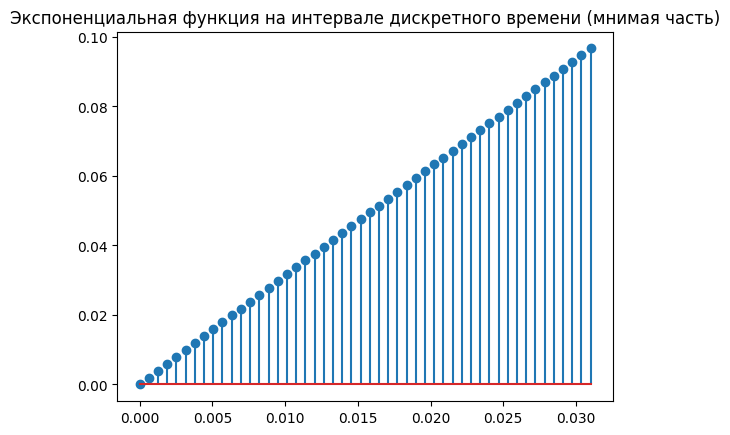

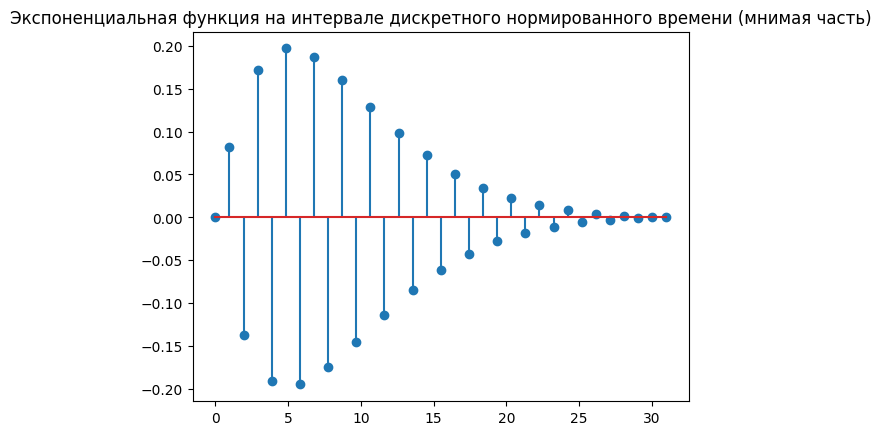

In [4]:
plt.stem(x, exp(x, 0))
plt.title("Экспоненциальная функция на интервале дискретного времени (вещественная часть)")
plt.show()
plt.stem(x_norm, exp(x_norm, 0))
plt.title("Экспоненциальная функция на интервале дискретного нормированного времени (вещественная часть)")
plt.show()
plt.stem(x, exp(x, 0, 'imag'))
plt.title("Экспоненциальная функция на интервале дискретного времени (мнимая часть)")
plt.show()
plt.stem(x_norm, exp(x_norm, 0, 'imag'))
plt.title("Экспоненциальная функция на интервале дискретного нормированного времени (мнимая часть)")
plt.show()

Соответствие между дискретной и аналоговой экспонентами: Точки дискретной экспоненты находятся в местах, где для аналоговой экспоненты $a^k$, $k$ – целые. Дискретная экспонента (экспоненциальная последовательность) образуется в результате дискретизации экспоненты.


4. Смоделируем дискретный комплексный гармонический сигнал $s_2 (k) = C exp(j \hat\omega_0 k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0, N-1]$. 

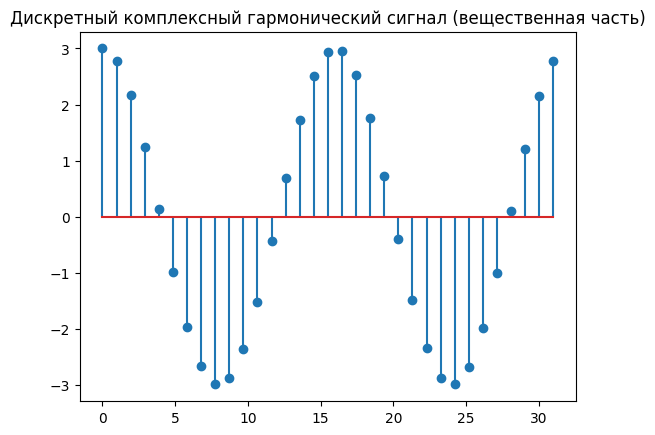

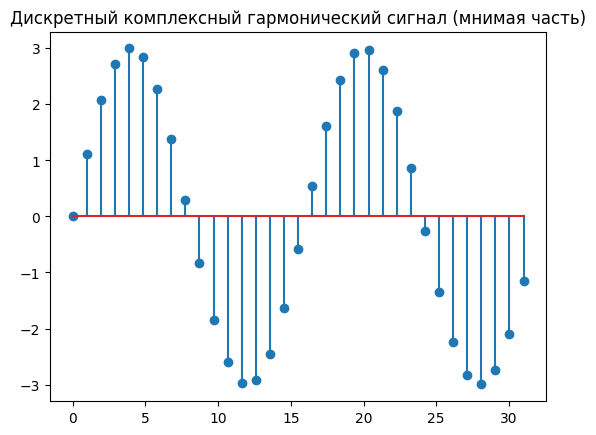

In [5]:
plt.stem(x_norm, exp2(x_norm))
plt.title("Дискретный комплексный гармонический сигнал (вещественная часть)")
plt.show()
plt.stem(x_norm, exp2(x_norm, 'imag'))
plt.title("Дискретный комплексный гармонический сигнал (мнимая часть)")
plt.show()

Записать данный сигнал в виде комбинации двух вещественных последовательностей.

5. Выведем графики последовательностей $\delta_d (k), \sigma_d (k)$ и $s_1 (k)$, задержанных на m отсчетов, на интервале времени $n \in [0, N-1]$. 

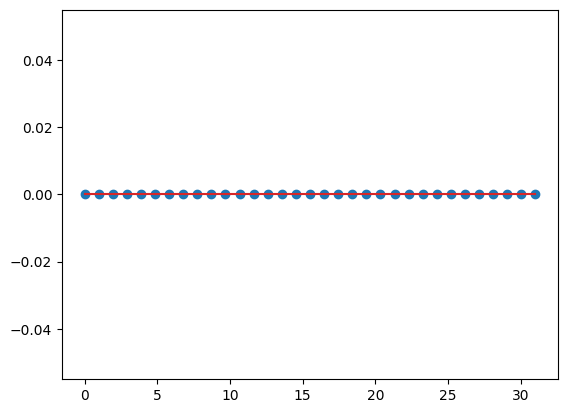

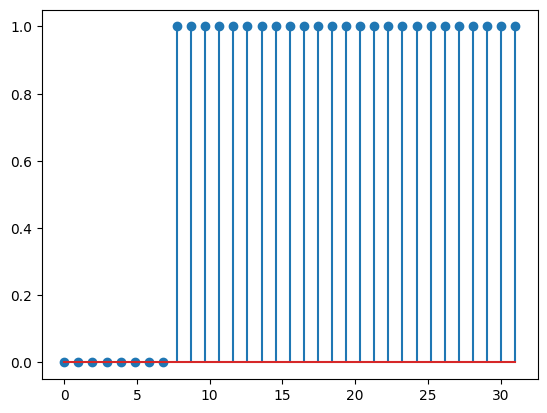

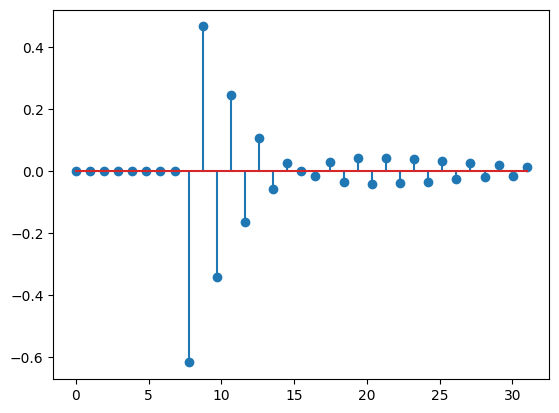

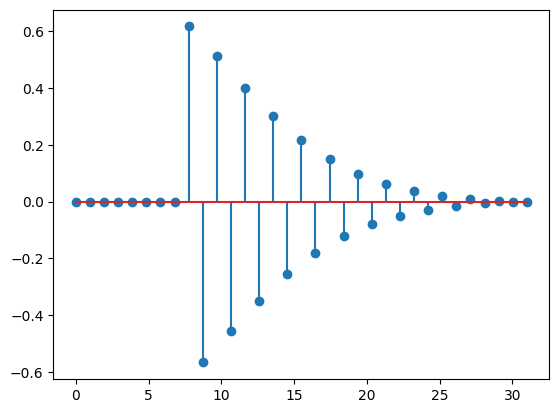

In [6]:
plt.stem(x_norm, dirak(x_norm, vv['m']))
plt.show()
plt.stem(x_norm, hs(x_norm, vv['m']))
plt.show()
plt.stem(x_norm, exp(x_norm, vv['m'], 'real'))
plt.show()
plt.stem(x_norm, exp(x_norm, vv['m'], 'imag'))
plt.show()

Формулы задержанных последовательностей:

1. Формула единичного импульса, задержанного на m отсчётов: $\delta_d (k) = \begin{equation*}
\begin{cases}
   1, k = m\\
   0, k \neq 0
 \end{cases}
\end{equation*}$

2. Формула единичного скачка, задержанного на m отсчётов: $\sigma_d (k) = \begin{equation*}
\begin{cases}
   1, k \geq m\\
   0, k < m
 \end{cases}
\end{equation*}$

3. Формула дискретной экспоненциальной функции, задержанной на m отсчётов: $s_1 (k) = \begin{equation*}
\begin{cases}
   a^{k-m}, k \geq m\\
   0, k < m
 \end{cases}
\end{equation*}$

## Выводы

1. Были изучены математические описания дискретных сигналов и получены навыки использования программных средств их моделирования.
2. Был исследован цифровой единичный импульс d на интервалах n и nT и на его примере изучена связь между дискретным и дискретным нормированным временем.
3. Был исследован цифровой единичный скачок d на интервалах n и nT, его частота дискретизации и соответствие с аналоговым единичным скачком.
4. Была исследована дискретная экспонента s1 на интервалах n и nT и её соответствие с аналоговой экспонентой.
5. Был исследован дискретный комплексный гармонический сигнал s2 на интервале времени n и переписан в виде комбинации двух вещественных последовательностей.
6. Были исследованы задержанные последовательности на интервале времени n и записаны их формулы.